#Rents in Berlin

The guys of the Berliner Morgenpost made [this nice interactive data viz](http://www.morgenpost.de/interaktiv/mieten/article136875377/So-stark-steigen-die-Mieten-in-Berlins-Kiezen.html?config=interactive). They also published the [data](https://docs.google.com/spreadsheets/d/1x77-onfnmmbSf7xMQf4H-Ak4ushbG-GzKyTd6_8h0nQ/edit?usp=sharing), so we can play with it. Let's do!  


rent = price in Euro per square meter

size = average size in square meter

year = year of data

zip = zip code

In [20]:
# That's the way we import and open a csv file in IPython Notebook

import csv
file = open("berlin-rent.csv")
rents = list(csv.DictReader(file))
rents

[{'offer': '1132',
  'rent': '11.53',
  'size': '79',
  'year': '2014',
  'zip': '10115'},
 {'offer': '1139',
  'rent': '12.9',
  'size': '99',
  'year': '2014',
  'zip': '10117'},
 {'offer': '720',
  'rent': '12.5',
  'size': '75',
  'year': '2014',
  'zip': '10119'},
 {'offer': '441',
  'rent': '12.5',
  'size': '89',
  'year': '2014',
  'zip': '10178'},
 {'offer': '448',
  'rent': '10.84',
  'size': '82',
  'year': '2014',
  'zip': '10179'},
 {'offer': '672',
  'rent': '10.0',
  'size': '61',
  'year': '2014',
  'zip': '10243'},
 {'offer': '1075',
  'rent': '10.0',
  'size': '61',
  'year': '2014',
  'zip': '10245'},
 {'offer': '1226',
  'rent': '10.0',
  'size': '61',
  'year': '2014',
  'zip': '10247'},
 {'offer': '948',
  'rent': '10.0',
  'size': '61',
  'year': '2014',
  'zip': '10249'},
 {'offer': '404', 'rent': '7.5', 'size': '62', 'year': '2014', 'zip': '10315'},
 {'offer': '418',
  'rent': '8.49',
  'size': '59',
  'year': '2014',
  'zip': '10317'},
 {'offer': '517',
  'ren

Unfortunately the integers are defined to be strings (""). I want to do some calculations so I have to convert them into real integers.

That's one way I can do this (maybe you know an easier way?):

In [4]:
# I convert the strings into integers

for row in rents:
    if row["size"] != "":
        row["size"] = int(row["size"])
    if row["year"] != "":
        row["year"] = int(row["year"])
    if row["zip"] != "":
        row["zip"] = int(row["zip"])
    if row["rent"] != "":
        row["rent"] = float(row["rent"])
    if row["offer"] != "":
        row["offer"] = int(row["offer"])
rents

[{'offer': 1132, 'rent': 11.53, 'size': 79, 'year': 2014, 'zip': 10115},
 {'offer': 1139, 'rent': 12.9, 'size': 99, 'year': 2014, 'zip': 10117},
 {'offer': 720, 'rent': 12.5, 'size': 75, 'year': 2014, 'zip': 10119},
 {'offer': 441, 'rent': 12.5, 'size': 89, 'year': 2014, 'zip': 10178},
 {'offer': 448, 'rent': 10.84, 'size': 82, 'year': 2014, 'zip': 10179},
 {'offer': 672, 'rent': 10.0, 'size': 61, 'year': 2014, 'zip': 10243},
 {'offer': 1075, 'rent': 10.0, 'size': 61, 'year': 2014, 'zip': 10245},
 {'offer': 1226, 'rent': 10.0, 'size': 61, 'year': 2014, 'zip': 10247},
 {'offer': 948, 'rent': 10.0, 'size': 61, 'year': 2014, 'zip': 10249},
 {'offer': 404, 'rent': 7.5, 'size': 62, 'year': 2014, 'zip': 10315},
 {'offer': 418, 'rent': 8.49, 'size': 59, 'year': 2014, 'zip': 10317},
 {'offer': 517, 'rent': 8.81, 'size': 76, 'year': 2014, 'zip': 10318},
 {'offer': 139, 'rent': 6.97, 'size': 59, 'year': 2014, 'zip': 10319},
 {'offer': 305, 'rent': 8.04, 'size': 58, 'year': 2014, 'zip': 10365},
 

In [13]:
# or like this:

# rent = [float(rent["rent"]) for rent in rents if rent["rent"] != ""]

I'm pretty sure that I want to compare the data of each year (2009 - 2014). So I make for each year a new list of dictionaries.

In [45]:
rent2009 = []
for rent in rents:
    if rent["year"] == 2009
    rent2009.append(rent["year"])
rent2009


rent2010 =
rent2011 =
rent2012 =
rent2013 =
rent2014 =

SyntaxError: invalid syntax (<ipython-input-45-8b56c1969294>, line 3)

## So, finally I cleaned my dataset and now we can do some fancy calculations! Hooray!

In [14]:
# Let's import numpy - numpy is a fundamental package for scientific computing with Python

import numpy as np

In [15]:
np.mean(rent)

7.2374159292035394

In [31]:
np.std(rent)

1.6442571161989961

In [16]:
np.median(rent)

7.0

In [22]:
# matplotlib
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

(array([   2.,    0.,    0.,   88.,  343.,  341.,  217.,   87.,   42.,   10.]),
 array([  0.   ,   1.311,   2.622,   3.933,   5.244,   6.555,   7.866,
          9.177,  10.488,  11.799,  13.11 ]),
 <a list of 10 Patch objects>)

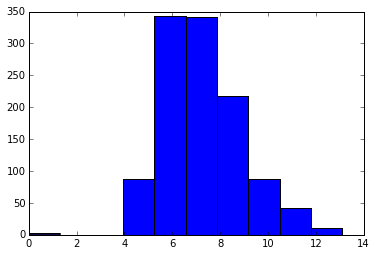

In [28]:
plt.hist(rent)

{'boxes': [<matplotlib.lines.Line2D at 0x106bcfe50>],
 'caps': [<matplotlib.lines.Line2D at 0x106bdedd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x106bf6110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x106be9a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x106bde0d0>,
  <matplotlib.lines.Line2D at 0x106bde790>]}

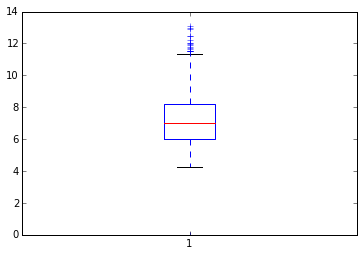

In [29]:
plt.boxplot(rent)

In [39]:
rent2009 = key.rent() if rent["year"] == 2009 for rent in rents
rent2010 =
rent2011 =
rent2012 =
rent2013 =
rent2014 =

SyntaxError: invalid syntax (<ipython-input-39-890f5e1d0500>, line 1)

In [27]:
plt.scatter

TypeError: float() argument must be a string or a number

In [19]:
x = rents[rent]
y = rents[zip]
plt.scatter(x,y)

TypeError: list indices must be integers, not list